<a href="https://colab.research.google.com/github/TheBottomOfTheDeepDarkOcean/AIO-Exercise/blob/develop/Module4/Module4_GeneticAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, delimiter=",", skip_header=1)
  N = len(data[:, 0])
  features_X = data[:, :3]
  features_X = np.hstack((np.ones((N, 1)), features_X))
  sales_Y = data[:,-1]
  return features_X, sales_Y

In [34]:
# X, y = load_data_from_file()
# print(X[:5,:])

In [35]:
# _ , sales_Y = load_data_from_file()
# print(sales_Y.shape)

In [36]:
def create_individual(n=4, bound=10):
  individual = []
  for i in range(n):
    individual.append(random.uniform(-bound/2 ,bound/2))
  return individual

In [37]:
# individual = create_individual()
# print(individual)



In [49]:
X , y = load_data_from_file()
def compute_loss(individual):
  theta = np.array(individual)
  y_hat = X.dot(theta)
  loss = np.multiply((y_hat - y), (y_hat - y)).mean()
  return loss
def compute_fitness(individual) :
  loss = compute_loss(individual)
  fitness_value = 1/ (loss+1)
  return fitness_value

In [39]:
# X, y = load_data_from_file()
# individual = [4.09 , 4.82 , 3.10 , 4.02]
# fitness_score = compute_fitness(individual)
# print(fitness_score)

In [40]:
def crossover(individual1, individual2, crossover_rate = 0.9):
  individual1_new = individual1.copy()
  individual2_new = individual2.copy()
  for i in range(len(individual1)):
    if random.random() < crossover_rate:
      individual1_new[i] = individual2[i]
      individual2_new[i] = individual1[i]
  return individual1_new , individual2_new

In [41]:
# individual1 = [4.09, 4.82, 3.10, 4.02]
# individual2 = [3.44, 2.57, -0.79, -2.41]
# individual1, individual2 = crossover(individual1, individual2, 2.0)
# print("individual1:", individual1)
# print ("individual2:", individual2)

In [42]:
def mutate(individual, mutation_rate = 0.05):
  individual_m = individual.copy()
  for i in range(len(individual)):
    if random.random() < mutation_rate:
      individual_m[i] = random.uniform(-10/2, 10/2)
  return individual_m

In [43]:
# before_individual = [4.09 , 4.82 , 3.10 , 4.02]
# after_individual = mutate(individual, mutation_rate = 2.0)
# print(before_individual == after_individual)
# print(after_individual)

In [44]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [45]:
def selection(sorted_old_population, m = 100):
  index1 = random.randint(0, m -1)
  while True:
    index2 = random.randint(0, m -1)
    if(index2 != index1):
      break
  individual_s = sorted_old_population[index1]
  if index2 > index1:
    individual_s = sorted_old_population[index2]
  return individual_s

In [55]:
def create_new_population(old_population, elitism =2 , gen =1):
  m = len(old_population)
  sorted_population = sorted(old_population, key=compute_fitness)
  if gen%1 == 0:
    print("Best loss:", compute_loss(sorted_population[m -1]), "with chromsome:", sorted_population[m -1])

  new_population = []
  while len(new_population) < m - elitism:
    individual_s1 = selection(sorted_population, m)
    individual_s2 = selection(sorted_population, m)
    individual_t1, individual_t2 = crossover(individual_s1, individual_s2)
    individual_m1 = mutate(individual_t1)
    individual_m2 = mutate(individual_t2)
    new_population.append(individual_m1)
    new_population.append(individual_m2)
  for ind in sorted_population[m - elitism:]:
    new_population.append(ind.copy())
  return new_population, compute_loss(sorted_population[m -1])

In [17]:
# individual1 = [4.09, 4.82, 3.10, 4.02]
# individual2 = [3.44, 2.57, -0.79, -2.41]
# old_population = [individual1, individual2]
# new_population, _ = create_new_population(old_population, elitism =2, gen =1)

Best loss: 123415.051528805 with chromsome: [3.44, 2.57, -0.79, -2.41]


In [56]:
def run_GA():
  n_generations = 100
  m = 600
  X, y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
    population, losses = create_new_population(population, 2, i)
    losses_list.append(losses)
  return losses_list, population

In [57]:
losses_list, population = run_GA()

Best loss: 334.5015766424321 with chromsome: [3.376880781254867, 0.21945935911534953, -0.19925308147752396, -0.45744353686668227]
Best loss: 334.5015766424321 with chromsome: [3.376880781254867, 0.21945935911534953, -0.19925308147752396, -0.45744353686668227]
Best loss: 334.5015766424321 with chromsome: [3.376880781254867, 0.21945935911534953, -0.19925308147752396, -0.45744353686668227]
Best loss: 278.1139049486005 with chromsome: [-0.14254601449415993, -0.0765343704677015, 0.2877384298984982, 0.3512029957049112]
Best loss: 278.1139049486005 with chromsome: [-0.14254601449415993, -0.0765343704677015, 0.2877384298984982, 0.3512029957049112]
Best loss: 278.1139049486005 with chromsome: [-0.14254601449415993, -0.0765343704677015, 0.2877384298984982, 0.3512029957049112]
Best loss: 278.1139049486005 with chromsome: [-0.14254601449415993, -0.0765343704677015, 0.2877384298984982, 0.3512029957049112]
Best loss: 113.44431065089502 with chromsome: [4.098017621729008, 0.10335744272128, 0.06435048

Best loss: 689.1289931828753 with chromsome: [-0.04786104880375319, 0.2716360594500671, 0.36799456034418565, -0.8890127012315627]
Best loss: 689.1289931828753 with chromsome: [-0.04786104880375319, 0.2716360594500671, 0.36799456034418565, -0.8890127012315627]
Best loss: 78.83096764623066 with chromsome: [4.551390371399739, 0.020096063143656195, 0.6428836661811088, -0.28289358218447447]
Best loss: 78.83096764623066 with chromsome: [4.551390371399739, 0.020096063143656195, 0.6428836661811088, -0.28289358218447447]
Best loss: 78.83096764623066 with chromsome: [4.551390371399739, 0.020096063143656195, 0.6428836661811088, -0.28289358218447447]
Best loss: 78.83096764623066 with chromsome: [4.551390371399739, 0.020096063143656195, 0.6428836661811088, -0.28289358218447447]
Best loss: 71.82975198051918 with chromsome: [-2.0984907967360513, 0.020096063143656195, 0.6428836661811088, -0.10865563506250986]
Best loss: 36.10222794191887 with chromsome: [-0.04786104880375319, 0.02096987213635515, 0.36

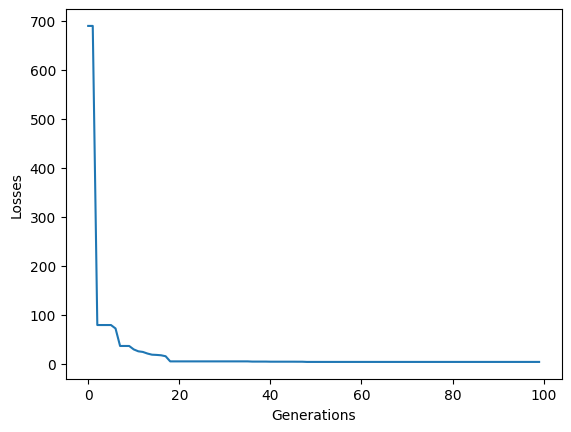

In [59]:
def visualize_loss(losses_list):
  plt.plot(losses_list)
  plt.xlabel("Generations")
  plt.ylabel("Losses")
  plt.show()
losses_list, population = run_GA()
visualize_loss(losses_list)

[4.371991964218987, 0.06163933552416534, 0.11858106409940472, -0.03474005113445777]


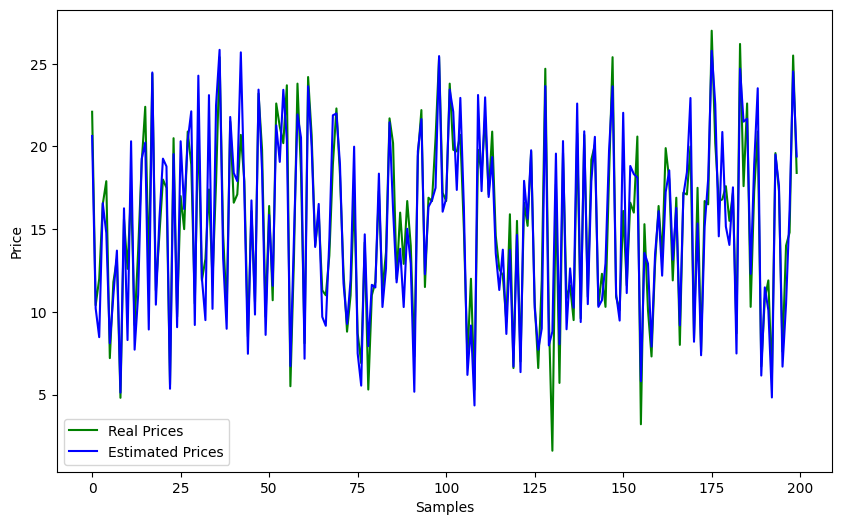

In [60]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in X:
    estimated_prices.append(feature.dot(theta))

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()